In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('Tension_data_set_2024.csv')

In [4]:
df.head()

,BP,BH,B2D,DH,T,D2H,T_level
0,14,0,35,5.5,31.50,22,M
1,19,0,35,5.5,26.96,17,M
2,16,0,36,5.5,33.13,19,H
3,17,0,36,5.5,33.13,18,H
4,17,0,36,5.5,33.90,18,H


# Regression 

In [14]:
data = df.drop('T_level', axis=1)

In [15]:
X = data.copy()
y = X.pop('T')

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
dt = DecisionTreeRegressor()

In [26]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [27]:
y_pred = dt.predict(X_test)

In [22]:
from sklearn.metrics import r2_score

In [29]:
r2_score(y_test, y_pred)

0.9367559632379757

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rnf = RandomForestRegressor(n_estimators=300)

In [32]:
rnf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300)

In [34]:
rnf_pred = rnf.predict(X_test)

In [35]:
r2_score(y_test, rnf_pred)

0.9565052863045955

## Preprocessing

In [43]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## SVM

In [46]:
from sklearn.svm import SVR

In [47]:
svr = SVR()

In [48]:
svr.fit(X_train_sc, y_train)

SVR()

In [49]:
svr_pred = svr.predict(X_test_sc)

In [50]:
r2_score(y_test, svr_pred)

0.5054815826405993

# Polynomial Regression

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [86]:
poly = PolynomialFeatures(degree=3)
x_poly_train = poly.fit_transform(X_train_sc)
x_poly_test = poly.transform(X_test_sc)

In [87]:
lr = LinearRegression()

In [88]:
lr.fit(x_poly_train, y_train)

LinearRegression()

In [89]:
lr_pred = lr.predict(x_poly_test)

In [90]:
r2_score(y_test, lr_pred)

0.5787284536040816

<Axes: ylabel='T'>

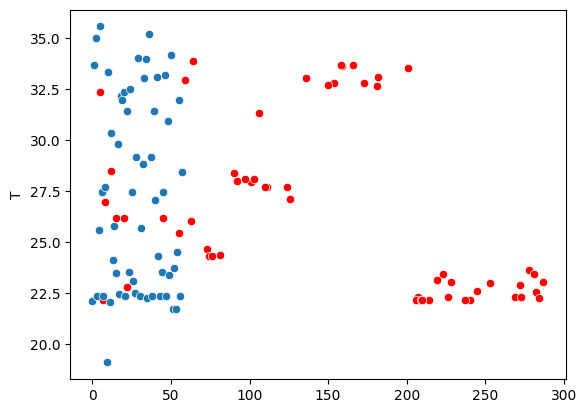

In [91]:
sns.scatterplot(y_test, c='r')
sns.scatterplot(lr_pred)

In [92]:
from sklearn.neighbors import KNeighborsRegressor

In [93]:
knn = KNeighborsRegressor(n_neighbors=7)

In [94]:
knn.fit(X_train_sc, y_train)

KNeighborsRegressor(n_neighbors=7)

In [95]:
knn_pred = knn.predict(X_test_sc)

In [96]:
r2_score(y_test, knn_pred)

0.8758840184591126

# ANN

In [164]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [165]:
data.shape

(288, 6)

In [171]:
ann = Sequential()
ann.add(Dense(100, kernel_initializer='normal',  activation ='relu' ))
ann.add(Dense(400, kernel_initializer='normal',  activation ='relu' ))
ann.add(Dense(300, kernel_initializer='normal',  activation ='relu' ))
ann.add(Dense(100, kernel_initializer='normal', activation='relu'  ))
ann.add(Dense(50, kernel_initializer='normal', activation='relu'  ))
ann.add(Dense(1, kernel_initializer='normal', activation='linear'))

In [172]:
ann.compile(optimizer='adam', loss='mae', metrics=['accuracy']   )
ann.fit(X_train_sc, y_train, epochs=600, verbose=0)

In [173]:
ann_pred = ann.predict(X_test_sc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


In [174]:
r2_score(ann_pred, y_test)

0.8679164020138204